In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import pearsonr
from scipy.stats import fisher_exact
from scipy.stats import pointbiserialr
from scipy.stats import ttest_ind

array([[<Axes: title={'center': 'account length'}>,
        <Axes: title={'center': 'number vmail messages'}>,
        <Axes: title={'center': 'total day minutes'}>,
        <Axes: title={'center': 'total day calls'}>],
       [<Axes: title={'center': 'total day charge'}>,
        <Axes: title={'center': 'total eve minutes'}>,
        <Axes: title={'center': 'total eve calls'}>,
        <Axes: title={'center': 'total eve charge'}>],
       [<Axes: title={'center': 'total night minutes'}>,
        <Axes: title={'center': 'total night calls'}>,
        <Axes: title={'center': 'total night charge'}>,
        <Axes: title={'center': 'total intl minutes'}>],
       [<Axes: title={'center': 'total intl calls'}>,
        <Axes: title={'center': 'total intl charge'}>,
        <Axes: title={'center': 'customer service calls'}>, <Axes: >]],
      dtype=object)

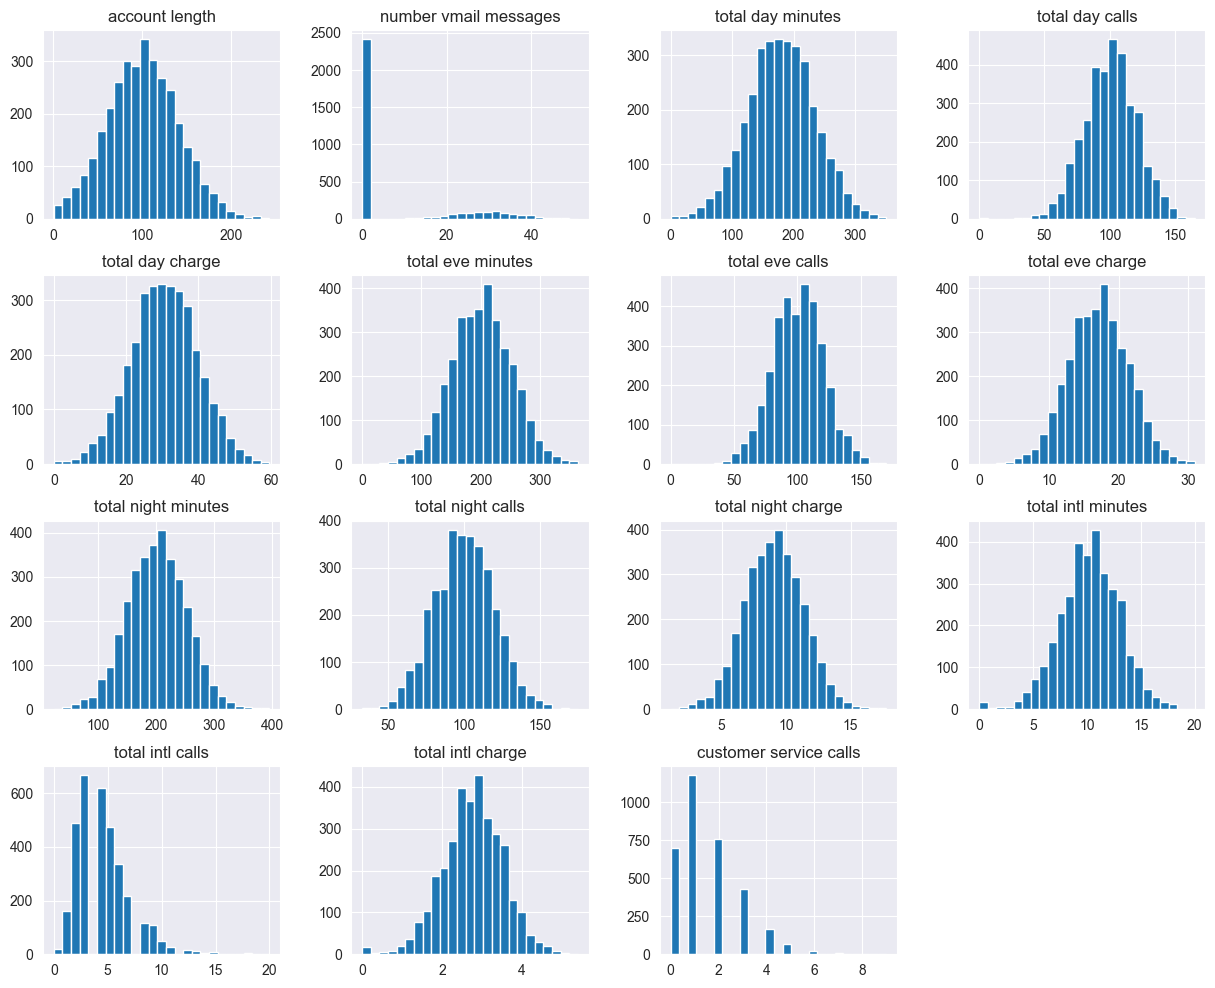

In [3]:
path = "C:/All/Other/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(path, sep=',')
df.drop(columns=['area code']).hist(figsize=(15, 12), bins=25)

In [4]:
df['state'] = df['state'].astype('string')

In [5]:
df = df.drop(columns=['phone number'])

In [6]:
columns_to_fix = df[['international plan', 'voice mail plan']]

for column in columns_to_fix:
    df[column] = df[column].map({'yes': True, 'no': False})

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns
df_num = df[num_cols]
corr_matrix = df_num.corr()

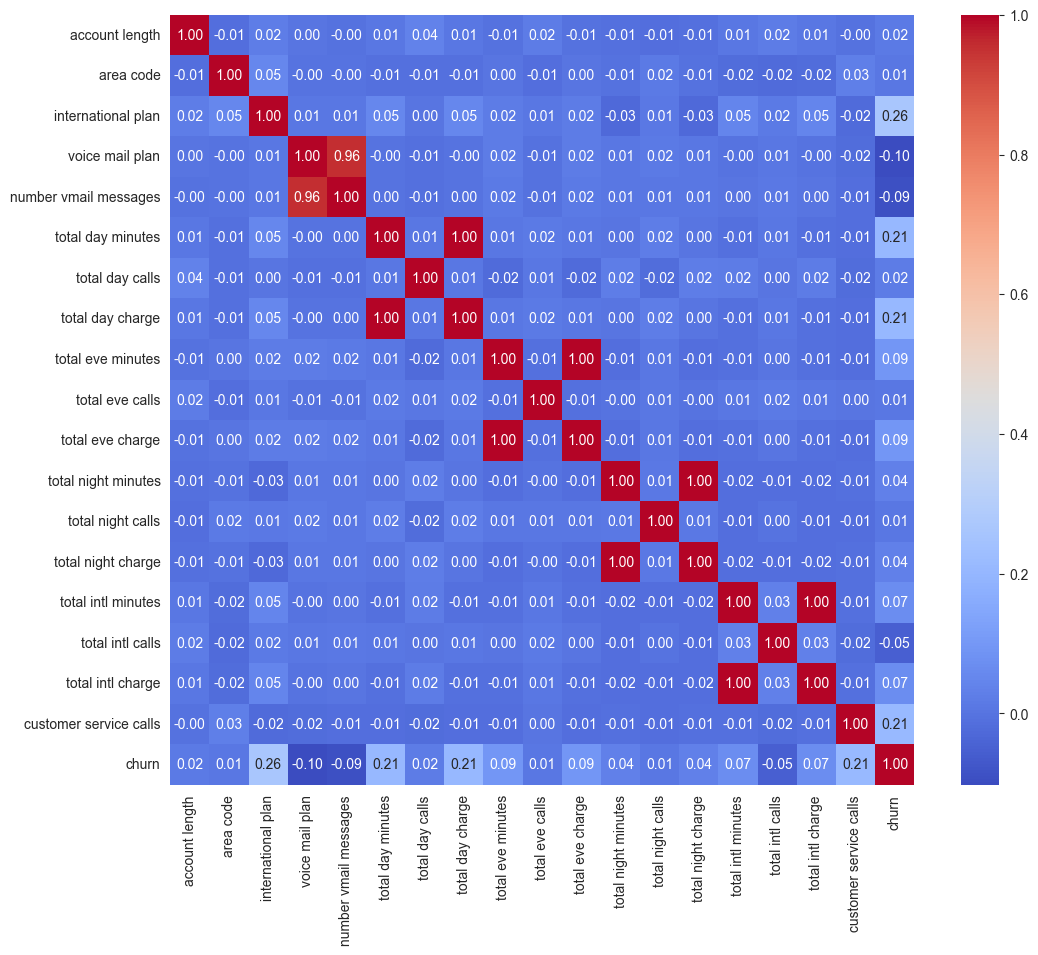

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [9]:
corr_matrix_abs = corr_matrix.abs()

np.fill_diagonal(corr_matrix_abs.values, 0)
max_corr = corr_matrix_abs.max().max()
max_pair = np.where(corr_matrix_abs == max_corr)
feature1 = corr_matrix_abs.index[max_pair[0][0]]
feature2 = corr_matrix_abs.columns[max_pair[1][0]]

print(feature1)
print(feature2)
print(max_corr)

total day minutes
total day charge
0.9999999521904007


In [10]:
for col in df.columns:
    if "total" in col.lower():
        corr, p_value = spearmanr(df["churn"], df[col])
        print(f"{col}: corr = {corr:.4f}, p_value = {p_value:.10f}")

total day minutes: corr = 0.1707, p_value = 0.0000000000
total day calls: corr = 0.0263, p_value = 0.1288408365
total day charge: corr = 0.1707, p_value = 0.0000000000
total eve minutes: corr = 0.0886, p_value = 0.0000003011
total eve calls: corr = 0.0086, p_value = 0.6205535359
total eve charge: corr = 0.0886, p_value = 0.0000003022
total night minutes: corr = 0.0343, p_value = 0.0474219966
total night calls: corr = 0.0047, p_value = 0.7864613257
total night charge: corr = 0.0344, p_value = 0.0473531183
total intl minutes: corr = 0.0609, p_value = 0.0004398188
total intl calls: corr = -0.0748, p_value = 0.0000155754
total intl charge: corr = 0.0609, p_value = 0.0004398188


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   string 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   bool   
 4   voice mail plan         3333 non-null   bool   
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [12]:
corr, p_value = spearmanr(df["churn"], df['state'])
print(f"{col}: corr = {corr:.4f}, p_value = {p_value:.10f}")

churn: corr = 0.0064, p_value = 0.7138942313


In [13]:
df = df.drop('state', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   bool   
 3   voice mail plan         3333 non-null   bool   
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [15]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   bool   
 3   voice mail plan         3333 non-null   bool   
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [17]:
bool_cols = df.select_dtypes(include=bool).columns
df[bool_cols] = df[bool_cols].astype(int)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [34]:
df['churn'] = df['churn'].astype(int)

X = df.drop(['churn'], axis=1)
y = df['churn']

for col in ['international plan', 'voice mail plan']:
    if X[col].dtype == 'bool' or X[col].dtype == 'object':
        X[col] = X[col].astype(int)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1>ЗАДАЧА КЛАССИФИКАЦИИ<h1>

<h2>НЕЙРОННАЯ СЕТЬ<h2>

In [40]:
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)
y_prob = mlp.predict_proba(X_test_scaled)[:, 1]

print("MLP")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

MLP
Accuracy: 0.905
ROC-AUC: 0.8492760637225246
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       855
           1       0.71      0.59      0.64       145

    accuracy                           0.91      1000
   macro avg       0.82      0.77      0.79      1000
weighted avg       0.90      0.91      0.90      1000

Confusion Matrix:
 [[820  35]
 [ 60  85]]


Best params: {'learning_rate_init': 0.01, 'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'tanh'}
F1-score: 0.6876
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       855
           1       0.72      0.54      0.62       145

    accuracy                           0.90      1000
   macro avg       0.83      0.75      0.78      1000
weighted avg       0.90      0.90      0.90      1000



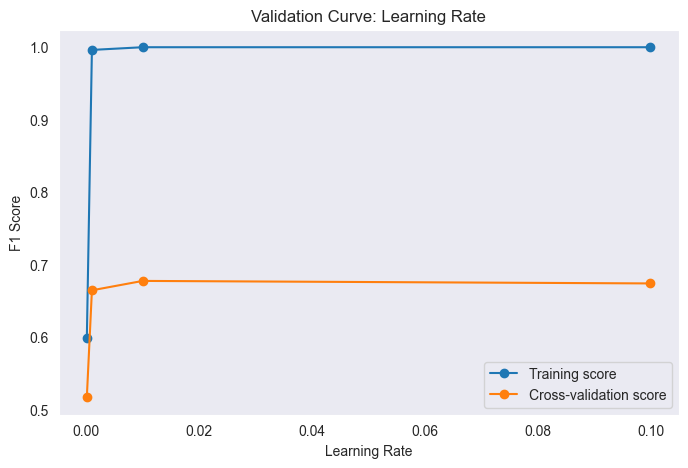

In [44]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.05],
    'alpha': [0.0001, 0.001, 0.01]
}

random_search = RandomizedSearchCV(
    MLPClassifier(max_iter=1000, random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print(f"Best params: {random_search.best_params_}")
print(f"F1-score: {random_search.best_score_:.4f}")

# Оцінка найкращої моделі на тесті
best_mlp = random_search.best_estimator_
y_pred_best = best_mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))

param_range = [0.0001, 0.001, 0.01, 0.1]
train_scores, test_scores = validation_curve(
    MLPClassifier(hidden_layer_sizes=random_search.best_params_['hidden_layer_sizes'],
                  activation=random_search.best_params_['activation'],
                  max_iter=500, random_state=42),
    X_train_scaled, y_train,
    param_name="learning_rate_init",
    param_range=param_range,
    scoring="f1",
    cv=3,
    n_jobs=-1
)

def plot_validation_curve(param_range, train_scores, test_scores, title, xlabel):
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(param_range, train_mean, label="Training score", marker='o')
    plt.plot(param_range, test_mean, label="Cross-validation score", marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_validation_curve(param_range, train_scores, test_scores,
                      "Validation Curve: Learning Rate", "Learning Rate")

<h2>АНСАМБЛЬ KNN<h2>

Best n_estimators: 20
Best F1-score: 0.4652


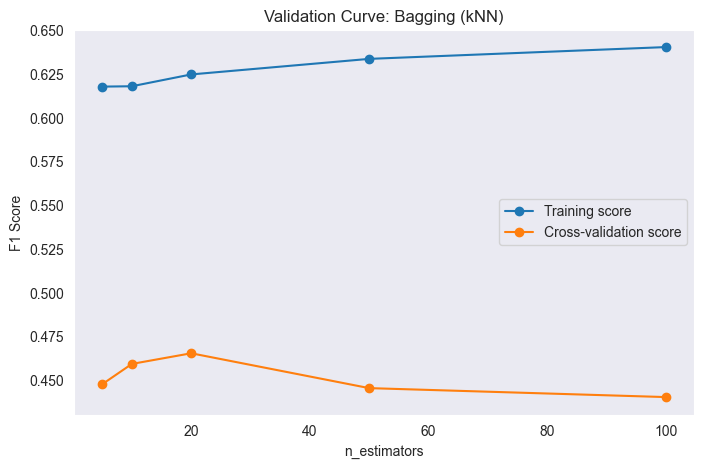

Bagging Test F1:               precision    recall  f1-score   support

           0       0.89      0.99      0.94       855
           1       0.85      0.30      0.45       145

    accuracy                           0.89      1000
   macro avg       0.87      0.65      0.69      1000
weighted avg       0.89      0.89      0.87      1000



In [51]:
from sklearn.model_selection import GridSearchCV

base_knn = KNeighborsClassifier(n_neighbors=5)

param_grid_bagging = {'n_estimators': [5, 10, 20, 50, 100]}

grid_bagging = GridSearchCV(
    BaggingClassifier(estimator=base_knn, random_state=42),
    param_grid_bagging,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_bagging.fit(X_train_scaled, y_train)

print(f"Best n_estimators: {grid_bagging.best_params_['n_estimators']}")
print(f"Best F1-score: {grid_bagging.best_score_:.4f}")

train_scores, test_scores = validation_curve(
    BaggingClassifier(estimator=base_knn, random_state=42),
    X_train_scaled, y_train,
    param_name="n_estimators",
    param_range=param_grid_bagging['n_estimators'],
    cv=3, scoring="f1", n_jobs=-1
)

def plot_validation_curve_linear(param_range, train_scores, test_scores, title, xlabel):
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    plt.figure(figsize=(8, 5))
    plt.plot(param_range, train_mean, label="Training score", marker='o')
    plt.plot(param_range, test_mean, label="Cross-validation score", marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("F1 Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_validation_curve_linear(param_grid_bagging['n_estimators'], train_scores, test_scores,
                             "Validation Curve: Bagging (kNN)", "n_estimators")

bagging_final = BaggingClassifier(estimator=base_knn, n_estimators=20, random_state=42)
bagging_final.fit(X_train_scaled, y_train)
print("Bagging Test F1:", classification_report(y_test, bagging_final.predict(X_test_scaled)))

Best n_estimators: 300
Best F1-score: 0.4698
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       855
           1       0.63      0.36      0.46       145

    accuracy                           0.88      1000
   macro avg       0.77      0.66      0.69      1000
weighted avg       0.86      0.88      0.86      1000



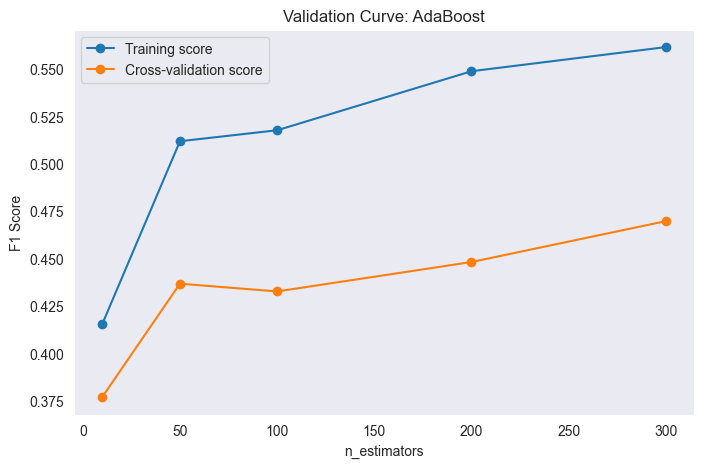

In [52]:
base_tree = DecisionTreeClassifier(max_depth=1, random_state=42)

param_grid_boost = {'n_estimators': [10, 50, 100, 200, 300]}

grid_boost = GridSearchCV(
    AdaBoostClassifier(estimator=base_tree, random_state=42),
    param_grid_boost,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid_boost.fit(X_train, y_train)

print(f"Best n_estimators: {grid_boost.best_params_['n_estimators']}")
print(f"Best F1-score: {grid_boost.best_score_:.4f}")

best_boost_model = grid_boost.best_estimator_
y_pred_boost = best_boost_model.predict(X_test)
print(classification_report(y_test, y_pred_boost))

train_scores, test_scores = validation_curve(
    AdaBoostClassifier(estimator=base_tree, random_state=42),
    X_train, y_train,
    param_name="n_estimators",
    param_range=param_grid_boost['n_estimators'],
    cv=3, scoring="f1", n_jobs=-1
)

plot_validation_curve_linear(param_grid_boost['n_estimators'], train_scores, test_scores,
                             "Validation Curve: AdaBoost", "n_estimators")